## Overall Object Tracking Results on 3 Dataset
- shapes_6dof
- inbound traffic
- outbound traffic

The result are caculated using HOTA metric with Detection Accuracy, Association Accuracy and HOTA, which correspond to Table3.

The result evalution using matlab script would take 1-2 minutes to finish.


In [1]:
from scipy import io
from scipy.spatial.distance import squareform, directed_hausdorff
from itertools import combinations
from sklearn.cluster import DBSCAN, AgglomerativeClustering
import numpy as np

import cv2
from tqdm import tqdm
from matplotlib import pyplot as plt
import matlab.engine
import argparse
import os
import csv
import yaml
from sw_wrap import *
from au_functions import *
import subprocess
import pandas as pd

### shapes_6dof

#### Config the parameters:

In [2]:
config_dir = "config/shapes_6dof.yml"
with open(config_dir, "r") as file:
    config = yaml.safe_load(file)
parameters = ARGS(config)

#### Run on the shape_6dof dataset and output results:

Split:  DBSCAN
Merge:  IOM


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1212986/1212986 [09:01<00:00, 2238.44it/s]


Name=shapes, HOTA=0.771818, DETA=0.733308, ASSA=0.813511



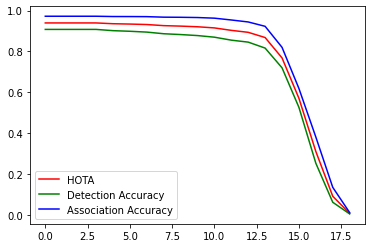

In [3]:
controller = Controller(parameters)
controller.Process()
controller.SaveResults()

### inbound traffic

Split:  DBSCAN
Merge:  IOM


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 637463/637463 [02:48<00:00, 3774.27it/s]


Name=inbound, HOTA=0.542826, DETA=0.509041, ASSA=0.579908



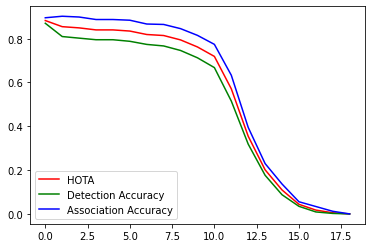

In [4]:
config_dir = "config/in_bound.yml"
with open(config_dir, "r") as file:
    config = yaml.safe_load(file)
parameters = ARGS(config)
controller = Controller(parameters)
controller.Process()
controller.SaveResults()

### outbound traffic

Split:  DBSCAN
Merge:  IOM


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 788761/788761 [03:39<00:00, 3587.49it/s]


Name=outbound, HOTA=0.431330, DETA=0.389906, ASSA=0.477726



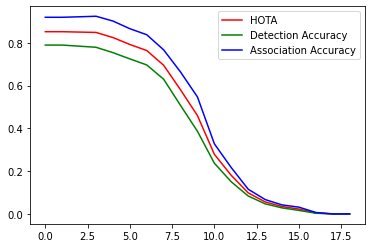

In [5]:
config_dir = "config/out_bound.yml"
with open(config_dir, "r") as file:
    config = yaml.safe_load(file)
parameters = ARGS(config)
controller = Controller(parameters)
controller.Process()
controller.SaveResults()

## Object Tracking Accuracy vs. Different Splitting Algorithm

#### Using DBCAN

Split:  DBSCAN
Merge:  IOM


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1212986/1212986 [09:09<00:00, 2208.42it/s]


Name=shapes, HOTA=0.771818, DETA=0.733308, ASSA=0.813511



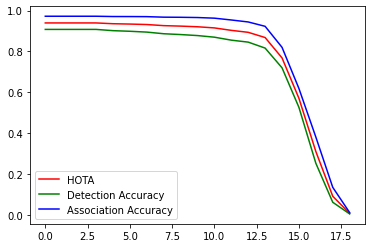

In [6]:
config_dir = "config/shapes_6dof.yml"
with open(config_dir, "r") as file:
    config = yaml.safe_load(file)
parameters = ARGS(config)
parameters.split = 'DBSCAN'
controller = Controller(parameters)
controller.Process()
controller.SaveResults()

#### Using HAC

Split:  HAC
Merge:  IOM


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1212986/1212986 [09:11<00:00, 2197.85it/s]


Name=shapes, HOTA=0.771818, DETA=0.733308, ASSA=0.813511



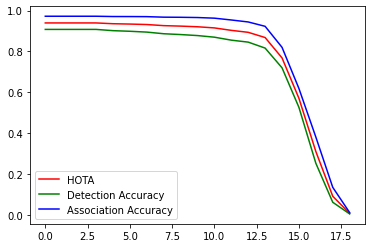

In [7]:
parameters.split = 'HAC'
controller = Controller(parameters)
controller.Process()
controller.SaveResults()

## AU numver vs. Accuracy

The below script will run several processes at the same time. It takes a few longer to complete (a few hours). 

In [8]:
template = 'python3 sw_wrap.py --config config/shapes_6dof.yml --name {} --outfolder ./result/au_num_shapes --auNum {}'

args = [[str(i), i] for i in range(1, 20)]

# Run commands in parallel
processes = []

for arg in args:
    command = template.format(*[str(a) for a in arg])
    process = subprocess.Popen(command, shell=True)
    processes.append(process)

# Collect statuses
output = [p.wait() for p in processes]

Split:  DBSCAN
Merge:  IOM
Split:  DBSCAN
Merge:  IOM


  1%|          | 6368/1212986 [00:00<01:10, 17006.88it/s]

Split:  DBSCAN
Merge:  IOM
Split:  DBSCAN
Merge:  IOM



  0%|          | 2736/1212986 [00:00<03:29, 5779.38it/s]

Split:  DBSCAN
Merge:  IOM
Split:  DBSCAN
Merge:  IOM



  0%|          | 1049/1212986 [00:00<04:33, 4433.78it/s]

Split:  DBSCAN
Merge:  IOM
Split:  DBSCAN
Merge:  IOM
Split:  DBSCAN
Merge:  IOM
Split:  DBSCAN
Merge:  IOM


  0%|          | 0/1212986 [00:00<?, ?it/s] 3004.04it/s]s]

Split:  DBSCAN
Merge:  IOM
Split:  DBSCAN
Merge:  IOM
Split:  DBSCAN
Merge:  IOM


  0%|          | 3194/1212986 [00:01<08:55, 2261.11it/s]] 

Split:  DBSCAN
Merge:  IOM
Split:  DBSCAN
Merge:  IOM
Split:  DBSCAN
Merge:  IOM



  1%|          | 6116/1212986 [00:01<10:25, 1930.24it/s]

Split:  DBSCAN
Merge:  IOM
Split:  DBSCAN
Merge:  IOM



  0%|          | 1229/1212986 [00:00<10:59, 1837.09it/s]

Split:  DBSCAN
Merge:  IOM


 59%|█████▉    | 715839/1212986 [08:40<05:24, 1529.81it/s]

Name=1, HOTA=0.261678, DETA=0.108951, ASSA=0.628939



 71%|███████   | 857337/1212986 [09:24<03:12, 1845.74it/s]]

Name=5, HOTA=0.634848, DETA=0.517200, ASSA=0.779769



 83%|████████▎ | 1004277/1212986 [09:45<02:29, 1399.51it/s]

Name=4, HOTA=0.543424, DETA=0.414383, ASSA=0.713129



 78%|███████▊  | 944736/1212986 [10:47<02:44, 1634.18it/s]]

Name=2, HOTA=0.361536, DETA=0.207684, ASSA=0.629590



 90%|████████▉ | 1086593/1212986 [12:38<01:30, 1390.48it/s]

Name=6, HOTA=0.661252, DETA=0.593749, ASSA=0.737202



 99%|█████████▉| 1198401/1212986 [13:00<00:06, 2377.84it/s]

Name=10, HOTA=0.778422, DETA=0.743202, ASSA=0.816616



 92%|█████████▏| 1121523/1212986 [13:33<00:42, 2157.00it/s]

Name=3, HOTA=0.453704, DETA=0.311122, ASSA=0.662064



 93%|█████████▎| 1127848/1212986 [13:37<00:32, 2603.28it/s]

Name=9, HOTA=0.774921, DETA=0.737367, ASSA=0.815568



 95%|█████████▍| 1148622/1212986 [13:44<00:30, 2124.10it/s]


Name=8, HOTA=0.757772, DETA=0.713886, ASSA=0.805477




 95%|█████████▍| 1149042/1212986 [13:45<00:32, 1991.00it/s]

Name=11, HOTA=0.776503, DETA=0.740417, ASSA=0.815645




100%|██████████| 1212986/1212986 [14:06<00:00, 1433.63it/s]


Name=12, HOTA=0.774814, DETA=0.737249, ASSA=0.815503



Name=7, HOTA=0.725890, DETA=0.671611, ASSA=0.785393

Name=13, HOTA=0.772526, DETA=0.734821, ASSA=0.813383



Name=14, HOTA=0.772940, DETA=0.735251, ASSA=0.813782



Name=15, HOTA=0.773020, DETA=0.734958, ASSA=0.814306

Name=16, HOTA=0.773049, DETA=0.735197, ASSA=0.814066



Name=17, HOTA=0.772458, DETA=0.734373, ASSA=0.813705



Name=18, HOTA=0.771936, DETA=0.733253, ASSA=0.813866



Name=19, HOTA=0.771664, DETA=0.733384, ASSA=0.813082



In [13]:
pd.read_csv("./result/au_num_shapes/result.csv", header=None, index_col=0, squeeze=True).to_dict()

{'./result/au_num_shapes/1tkBoxes.mat': 0.261678272599947,
 './result/au_num_shapes/5tkBoxes.mat': 0.6348477811489792,
 './result/au_num_shapes/4tkBoxes.mat': 0.5434243552029884,
 './result/au_num_shapes/2tkBoxes.mat': 0.3615363614063412,
 './result/au_num_shapes/6tkBoxes.mat': 0.6612520033925966,
 './result/au_num_shapes/10tkBoxes.mat': 0.7784221356083394,
 './result/au_num_shapes/3tkBoxes.mat': 0.4537036590072734,
 './result/au_num_shapes/9tkBoxes.mat': 0.7749210946449525,
 './result/au_num_shapes/8tkBoxes.mat': 0.7577717761805411,
 './result/au_num_shapes/11tkBoxes.mat': 0.7765030764099458,
 './result/au_num_shapes/12tkBoxes.mat': 0.7748138764380128,
 './result/au_num_shapes/7tkBoxes.mat': 0.7258903370526761,
 './result/au_num_shapes/13tkBoxes.mat': 0.7725260949838092,
 './result/au_num_shapes/14tkBoxes.mat': 0.7729400861004176,
 './result/au_num_shapes/15tkBoxes.mat': 0.7730204414610214,
 './result/au_num_shapes/16tkBoxes.mat': 0.773049017952227,
 './result/au_num_shapes/17tkBoxes.

In [9]:
template = 'python3 sw_wrap.py --config config/in_bound.yml --name {} --outfolder ./result/au_num_inbound --auNum {}'

args = [[str(i), i] for i in range(1, 20)]

# Run commands in parallel
processes = []

for arg in args:
    command = template.format(*[str(a) for a in arg])
    process = subprocess.Popen(command, shell=True)
    processes.append(process)

# Collect statuses
output = [p.wait() for p in processes]

Split:  DBSCAN
Merge:  IOM
Split:  DBSCAN
Merge:  IOM


  0%|          | 0/637463 [00:00<?, ?it/s] 7097.92it/s]

Split:  DBSCAN
Merge:  IOM
Split:  DBSCAN
Merge:  IOM



  0%|          | 471/637463 [00:00<02:15, 4708.84it/s]

Split:  DBSCAN
Merge:  IOM
Split:  DBSCAN
Merge:  IOM
Split:  DBSCAN
Merge:  IOM



  0%|          | 294/637463 [00:00<03:46, 2816.07it/s]

Split:  DBSCAN
Merge:  IOM
Split:  DBSCAN
Merge:  IOM


  0%|          | 2373/637463 [00:00<03:46, 2799.10it/s]]

Split:  DBSCAN
Merge:  IOM
Split:  DBSCAN
Merge:  IOM



  0%|          | 754/637463 [00:00<12:17, 863.15it/s]

Split:  DBSCAN
Merge:  IOM
Split:  DBSCAN
Merge:  IOM
Split:  DBSCAN
Merge:  IOM



  0%|          | 974/637463 [00:00<11:49, 896.82it/s]

Split:  DBSCAN
Merge:  IOM
Split:  DBSCAN
Merge:  IOM


  0%|          | 114/637463 [00:00<09:32, 1114.11it/s]]]

Split:  DBSCAN
Merge:  IOM
Split:  DBSCAN
Merge:  IOM



  0%|          | 1935/637463 [00:01<13:50, 765.48it/s]

Split:  DBSCAN
Merge:  IOM


 25%|██▍       | 157737/637463 [01:54<03:29, 2293.37it/s]

Name=1, HOTA=0.319543, DETA=0.194649, ASSA=0.525135



 63%|██████▎   | 399604/637463 [03:03<01:33, 2532.76it/s]

Name=2, HOTA=0.353241, DETA=0.252479, ASSA=0.494791



 81%|████████▏ | 519178/637463 [03:34<00:57, 2060.45it/s]

Name=6, HOTA=0.542826, DETA=0.509041, ASSA=0.579908



 69%|██████▊   | 437164/637463 [03:43<01:17, 2585.90it/s]

Name=8, HOTA=0.544380, DETA=0.511429, ASSA=0.580500



 63%|██████▎   | 400355/637463 [03:58<01:50, 2149.27it/s]

Name=3, HOTA=0.415273, DETA=0.328963, ASSA=0.524741



 96%|█████████▌| 612602/637463 [04:46<00:10, 2362.67it/s]

Name=4, HOTA=0.488962, DETA=0.429568, ASSA=0.557266



 84%|████████▎ | 532563/637463 [04:59<00:34, 3005.78it/s]

Name=7, HOTA=0.544380, DETA=0.511429, ASSA=0.580500



 99%|█████████▉| 632403/637463 [05:12<00:01, 3179.64it/s]

Name=5, HOTA=0.510425, DETA=0.482229, ASSA=0.541102



 96%|█████████▋| 614952/637463 [05:27<00:11, 2020.88it/s]

Name=9, HOTA=0.544380, DETA=0.511429, ASSA=0.580500



 92%|█████████▏| 586130/637463 [05:39<00:20, 2459.60it/s]

Name=10, HOTA=0.544380, DETA=0.511429, ASSA=0.580500



 99%|█████████▊| 628994/637463 [05:47<00:09, 870.70it/s]]

Name=11, HOTA=0.544380, DETA=0.511429, ASSA=0.580500



 96%|█████████▌| 611239/637463 [05:53<00:07, 3369.49it/s]

Name=16, HOTA=0.570004, DETA=0.547999, ASSA=0.594252




 96%|█████████▌| 611932/637463 [05:53<00:07, 3230.96it/s]

Name=13, HOTA=0.549823, DETA=0.518094, ASSA=0.584557




 97%|█████████▋| 615552/637463 [05:54<00:08, 2528.31it/s]


Name=12, HOTA=0.546727, DETA=0.514183, ASSA=0.582356



 99%|█████████▉| 632786/637463 [05:56<00:01, 3387.24it/s]

Name=18, HOTA=0.574243, DETA=0.556040, ASSA=0.594389




 99%|█████████▉| 633479/637463 [05:56<00:01, 3356.41it/s]


Name=14, HOTA=0.564872, DETA=0.544201, ASSA=0.587522



 99%|█████████▉| 633593/637463 [06:02<00:01, 3462.01it/s]

Name=15, HOTA=0.565745, DETA=0.545838, ASSA=0.587601



100%|██████████| 637463/637463 [06:03<00:00, 1753.57it/s]


Name=17, HOTA=0.570004, DETA=0.547999, ASSA=0.594252



Name=19, HOTA=0.574243, DETA=0.556040, ASSA=0.594389



In [15]:
pd.read_csv("./result/au_num_inbound/result.csv", header=None, index_col=0, squeeze=True).to_dict()

{'./result/au_num_inbound/1tkBoxes.mat': 0.3195428699419073,
 './result/au_num_inbound/2tkBoxes.mat': 0.3532409157975817,
 './result/au_num_inbound/6tkBoxes.mat': 0.542825785383082,
 './result/au_num_inbound/8tkBoxes.mat': 0.5443798833591129,
 './result/au_num_inbound/3tkBoxes.mat': 0.4152730149863107,
 './result/au_num_inbound/4tkBoxes.mat': 0.4889621130883367,
 './result/au_num_inbound/7tkBoxes.mat': 0.5443798833591129,
 './result/au_num_inbound/5tkBoxes.mat': 0.510424912523475,
 './result/au_num_inbound/9tkBoxes.mat': 0.5443798833591129,
 './result/au_num_inbound/10tkBoxes.mat': 0.5443798833591129,
 './result/au_num_inbound/11tkBoxes.mat': 0.5443798833591129,
 './result/au_num_inbound/16tkBoxes.mat': 0.5700040812188414,
 './result/au_num_inbound/13tkBoxes.mat': 0.5498231223637854,
 './result/au_num_inbound/12tkBoxes.mat': 0.5467268455813038,
 './result/au_num_inbound/18tkBoxes.mat': 0.574242830901345,
 './result/au_num_inbound/14tkBoxes.mat': 0.5648715440596032,
 './result/au_num_in

In [10]:
template = 'python3 sw_wrap.py --config config/out_bound.yml --name {} --outfolder ./result/au_num_outbound --auNum {}'

args = [[str(i), i] for i in range(1, 20)]

# Run commands in parallel
processes = []

for arg in args:
    command = template.format(*[str(a) for a in arg])
    process = subprocess.Popen(command, shell=True)
    processes.append(process)

# Collect statuses
output = [p.wait() for p in processes]

Split:  DBSCAN
Merge:  IOM
Split:  DBSCAN
Merge:  IOM



  0%|          | 453/788761 [00:00<02:54, 4525.06it/s]

Split:  DBSCAN
Merge:  IOM
Split:  DBSCAN
Merge:  IOM


  0%|          | 1185/788761 [00:00<07:02, 1865.33it/s]]

Split:  DBSCAN
Merge:  IOM
Split:  DBSCAN
Merge:  IOM



  1%|          | 9231/788761 [00:00<00:52, 14741.16it/s]

Split:  DBSCAN
Merge:  IOM
Split:  DBSCAN
Merge:  IOM
Split:  DBSCAN
Merge:  IOM


  0%|          | 1860/788761 [00:01<10:33, 1242.00it/s]s]

Split:  DBSCAN
Merge:  IOM
Split:  DBSCAN
Merge:  IOM


  0%|          | 2112/788761 [00:01<09:46, 1340.94it/s]s]

Split:  DBSCAN
Merge:  IOM
Split:  DBSCAN
Merge:  IOM



  0%|          | 2260/788761 [00:00<03:59, 3285.46it/s]

Split:  DBSCAN
Merge:  IOM
Split:  DBSCAN
Merge:  IOM
Split:  DBSCAN
Merge:  IOM


  0%|          | 1452/788761 [00:00<09:09, 1432.54it/s]s]

Split:  DBSCAN
Merge:  IOM
Split:  DBSCAN
Merge:  IOM


  0%|          | 2290/788761 [00:01<09:40, 1354.83it/s]s]

Split:  DBSCAN
Merge:  IOM


 48%|████▊     | 378532/788761 [01:43<02:43, 2504.12it/s]

Name=1, HOTA=0.235623, DETA=0.145547, ASSA=0.381713



 34%|███▍      | 267769/788761 [03:32<04:22, 1987.11it/s]

Name=2, HOTA=0.317579, DETA=0.261919, ASSA=0.385695



 62%|██████▏   | 485979/788761 [04:40<04:05, 1234.54it/s]

Name=3, HOTA=0.374757, DETA=0.341444, ASSA=0.412895



 58%|█████▊    | 460295/788761 [06:41<01:50, 2962.23it/s]

Name=4, HOTA=0.429688, DETA=0.391726, ASSA=0.471929



 93%|█████████▎| 736082/788761 [07:02<00:24, 2156.34it/s]


Name=5, HOTA=0.426002, DETA=0.387509, ASSA=0.468892



 62%|██████▏   | 487964/788761 [07:23<02:22, 2115.70it/s]

Name=6, HOTA=0.431330, DETA=0.389906, ASSA=0.477726



 91%|█████████ | 719735/788761 [07:28<00:32, 2126.12it/s]

Name=7, HOTA=0.429394, DETA=0.390047, ASSA=0.473252



 86%|████████▌ | 675112/788761 [07:34<00:36, 3134.43it/s]

Name=8, HOTA=0.429394, DETA=0.390047, ASSA=0.473252



 95%|█████████▍| 748399/788761 [07:39<00:14, 2776.77it/s]

Name=9, HOTA=0.416323, DETA=0.380264, ASSA=0.456183



 74%|███████▍  | 582162/788761 [07:48<01:06, 3085.77it/s]

Name=10, HOTA=0.416217, DETA=0.380177, ASSA=0.456059



 74%|███████▍  | 584416/788761 [08:09<01:05, 3136.58it/s]

Name=11, HOTA=0.415777, DETA=0.379788, ASSA=0.455561



 93%|█████████▎| 735425/788761 [08:19<00:18, 2903.77it/s]

Name=12, HOTA=0.415446, DETA=0.380129, ASSA=0.454414



 90%|█████████ | 711224/788761 [08:23<00:27, 2810.48it/s]

Name=13, HOTA=0.415176, DETA=0.379894, ASSA=0.454105



 92%|█████████▏| 729305/788761 [08:29<00:23, 2536.47it/s]

Name=14, HOTA=0.414655, DETA=0.379428, ASSA=0.453522



 99%|█████████▉| 779090/788761 [08:54<00:01, 5013.24it/s]

Name=15, HOTA=0.414666, DETA=0.379428, ASSA=0.453547



 95%|█████████▍| 745567/788761 [09:06<00:10, 4228.85it/s]


Name=16, HOTA=0.415919, DETA=0.380980, ASSA=0.454456



 99%|█████████▉| 778939/788761 [09:15<00:02, 4823.52it/s]


Name=18, HOTA=0.413818, DETA=0.380529, ASSA=0.450449



100%|██████████| 788761/788761 [09:17<00:00, 1415.44it/s]

Name=17, HOTA=0.415217, DETA=0.380592, ASSA=0.453383



Name=19, HOTA=0.414745, DETA=0.381329, ASSA=0.451522



In [16]:
pd.read_csv("./result/au_num_outbound/result.csv", header=None, index_col=0, squeeze=True).to_dict()

{'./result/au_num_outbound/1tkBoxes.mat': 0.2356225383767055,
 './result/au_num_outbound/2tkBoxes.mat': 0.3175789770979184,
 './result/au_num_outbound/3tkBoxes.mat': 0.3747574778799741,
 './result/au_num_outbound/4tkBoxes.mat': 0.4296878457012357,
 './result/au_num_outbound/5tkBoxes.mat': 0.4260015747851142,
 './result/au_num_outbound/6tkBoxes.mat': 0.4313302271302188,
 './result/au_num_outbound/7tkBoxes.mat': 0.4293935140936143,
 './result/au_num_outbound/8tkBoxes.mat': 0.4293935140936143,
 './result/au_num_outbound/9tkBoxes.mat': 0.416323075431888,
 './result/au_num_outbound/10tkBoxes.mat': 0.4162172054949188,
 './result/au_num_outbound/11tkBoxes.mat': 0.4157769475345027,
 './result/au_num_outbound/12tkBoxes.mat': 0.4154463852939755,
 './result/au_num_outbound/13tkBoxes.mat': 0.4151764846164679,
 './result/au_num_outbound/14tkBoxes.mat': 0.4146550298208843,
 './result/au_num_outbound/15tkBoxes.mat': 0.4146660945569355,
 './result/au_num_outbound/16tkBoxes.mat': 0.4159191906643215,
 '